# EDA

This notebok is the first of 5 notebooks in total.

**Notebook 1 of 5**

### **`EDA`**, `Data Preparation`, `Clustering`, `Regression`, `Classification`

#### Students in Group 15:

Jake Brady - 19238428

Anirudh Verma - 23120231

Sakina Padghawala - 23011823

Soumadip Patra - 23168471

Tanmay Srivastava - 23118067

**All Students in the group contributed equally**

#### **Layout of Notebook:**
- 0. Import required libraries
- 1. Load and preview the basics of the dataset
- 2. Explore Categorical Features
- 3. Explore numerical features
- 4. Basic Analysis between features
- 5. Save Dataset

## 0. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## 1. Load and preview the basics of the dataset

In [2]:
df = pd.read_csv("steel_industry_data_excerpt.csv")
df.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,01/01/2018 02:30,3.78,4.72,0.00,0.0,62.51,100.00,9000,Weekday,Monday
1,01/01/2018 04:15,3.28,3.82,0.00,0.0,65.14,100.00,15300,Weekday,Monday
2,01/01/2018 05:45,3.28,3.49,0.00,0.0,68.48,100.00,20700,Weekday,Monday
3,01/01/2018 10:00,3.64,0.00,16.88,0.0,100.00,21.08,36000,Weekday,Monday
4,01/01/2018 10:30,3.71,0.00,18.00,0.0,100.00,20.19,37800,Weekday,Monday


In [3]:
print(df.shape)

(2190, 10)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  2190 non-null   object 
 1   Usage_kWh                             2190 non-null   float64
 2   Lagging_Current_Reactive.Power_kVarh  2190 non-null   float64
 3   Leading_Current_Reactive_Power_kVarh  2190 non-null   float64
 4   CO2(tCO2)                             2190 non-null   float64
 5   Lagging_Current_Power_Factor          2190 non-null   float64
 6   Leading_Current_Power_Factor          2190 non-null   float64
 7   NSM                                   2190 non-null   int64  
 8   WeekStatus                            2190 non-null   object 
 9   Day_of_week                           2190 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 171.2+ KB


In [5]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,28.438712,13.658685,3.959279,0.012027,80.943201,83.976822,43025.342466
std,34.055560,16.818180,7.512796,0.016445,18.751234,30.844623,24820.208535
min,2.480000,0.000000,0.000000,0.000000,40.710000,13.810000,0.000000
25%,3.240000,2.240000,0.000000,0.000000,64.125000,99.760000,21600.000000
50%,4.640000,5.040000,0.000000,0.000000,88.280000,100.000000,43200.000000
75%,52.780000,24.480000,2.200000,0.020000,99.087500,100.000000,64800.000000
max,145.300000,90.680000,27.360000,0.070000,100.000000,100.000000,85500.000000


Renaming these two columns to maintain naming consistency

In [6]:
df = df.rename(columns={"Lagging_Current_Reactive.Power_kVarh":"Lagging_Current_Reactive_Power_kVarh", 
                        "CO2(tCO2)":"CO2"})

## 2. Explore the categorical features

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['date', 'WeekStatus', 'Day_of_week'], dtype='object')


`'date'` is not a real categorical feature so we will drop it from the list

In [8]:
categorical_columns = categorical_columns.drop('date')

for col in categorical_columns:
    print(f"{col}:")
    
    non_null = df[col].count()
    print("Non-null:", df[col].count())
    if non_null != df.shape[0]:
        print("Missing values:", df.shape[0] - df[col].count())
    print()

    print("Value counts:")
    print(df[col].value_counts())
    print("--------------------------------------------\n")

WeekStatus:
Non-null: 2190

Value counts:
WeekStatus
Weekday    1586
Weekend     604
Name: count, dtype: int64
--------------------------------------------

Day_of_week:
Non-null: 2190

Value counts:
Day_of_week
Friday       333
Tuesday      327
Monday       315
Thursday     314
Sunday       304
Saturday     300
Wednesday    297
Name: count, dtype: int64
--------------------------------------------



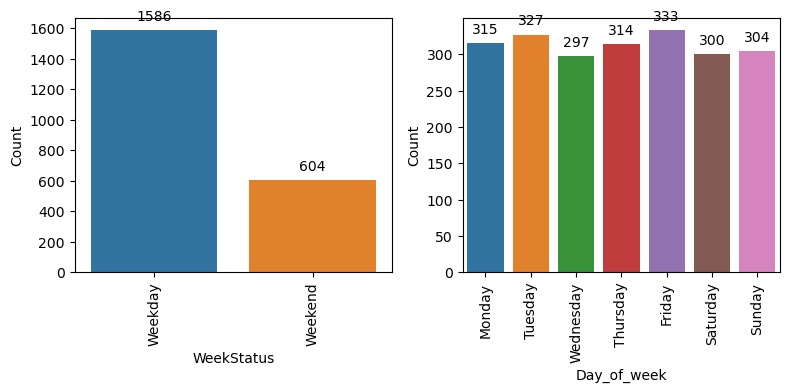

In [9]:
categorical_df = pd.DataFrame(df[categorical_columns])

# Set the plot size
plt.figure(figsize=(8, 4))

for i, col in enumerate(categorical_df.columns):
    plt.subplot(1, 2, i+1) 
    sns.countplot(x=col, data=categorical_df, hue=col)
    plt.xticks(rotation='vertical')
    plt.xlabel(col)
    plt.ylabel('Count')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()

**Conclusion**

There are no nulls found in either of the two categorical columns.

There appears to be a relatively even distribution of datapoints for each day.

There is an expected uneven distribution between weekdays and weekends. It is expected because there are 2 weekend days in a week and 5 weekday days in a week. This would imply approximately a 2.5:1 ratio which is what we observe in the dataset.

This will imply we have a even distribution of datapoints in our set and each category is fairly represented.

## 3. Explore the numerical features

In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')


In [11]:
numerical_df = pd.DataFrame(df[numerical_columns])
nan_values = numerical_df.isna() 
nan_summary = nan_values.sum()

# Print the summary
print("NaN Summary:")
print(nan_summary)

NaN Summary:
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
dtype: int64


**Conclusion**

No missing values

### 3.1 View the boxplot and 5 number summary for each of the features

Usage_kWh:
min      2.48
25%      3.24
50%      4.64
75%     52.78
max    145.30
Name: Usage_kWh, dtype: float64


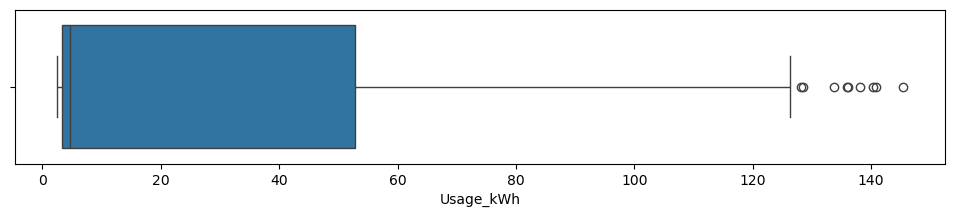

------------------------------------------------------------------------------------------------------------------------------------------------------
Lagging_Current_Reactive_Power_kVarh:
min     0.00
25%     2.24
50%     5.04
75%    24.48
max    90.68
Name: Lagging_Current_Reactive_Power_kVarh, dtype: float64


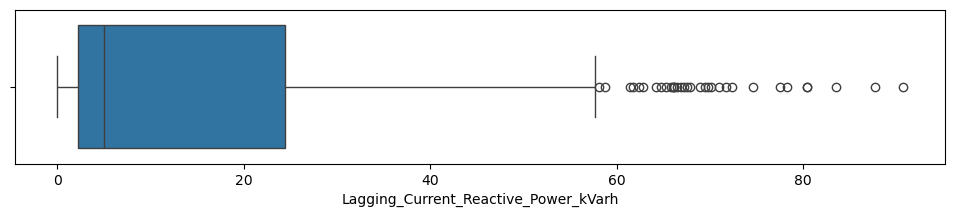

------------------------------------------------------------------------------------------------------------------------------------------------------
Leading_Current_Reactive_Power_kVarh:
min     0.00
25%     0.00
50%     0.00
75%     2.20
max    27.36
Name: Leading_Current_Reactive_Power_kVarh, dtype: float64


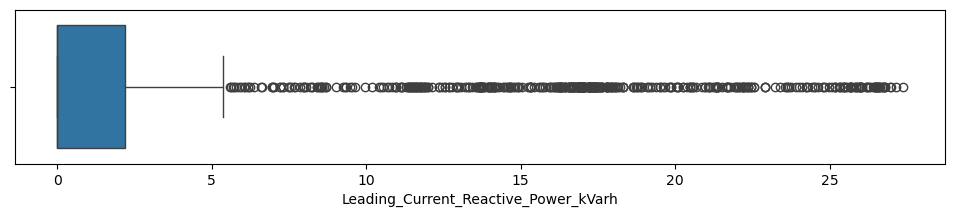

------------------------------------------------------------------------------------------------------------------------------------------------------
CO2:
min    0.00
25%    0.00
50%    0.00
75%    0.02
max    0.07
Name: CO2, dtype: float64


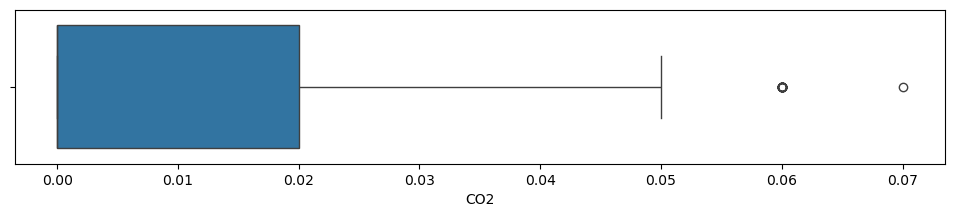

------------------------------------------------------------------------------------------------------------------------------------------------------
Lagging_Current_Power_Factor:
min     40.7100
25%     64.1250
50%     88.2800
75%     99.0875
max    100.0000
Name: Lagging_Current_Power_Factor, dtype: float64


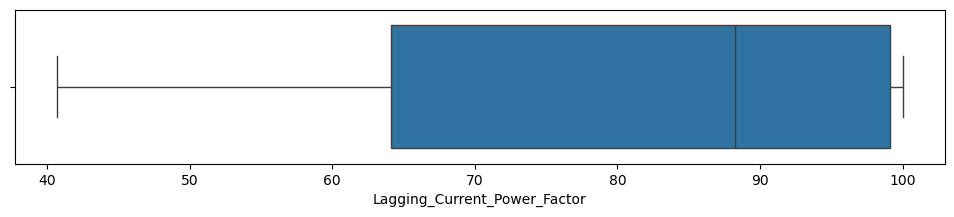

------------------------------------------------------------------------------------------------------------------------------------------------------
Leading_Current_Power_Factor:
min     13.81
25%     99.76
50%    100.00
75%    100.00
max    100.00
Name: Leading_Current_Power_Factor, dtype: float64


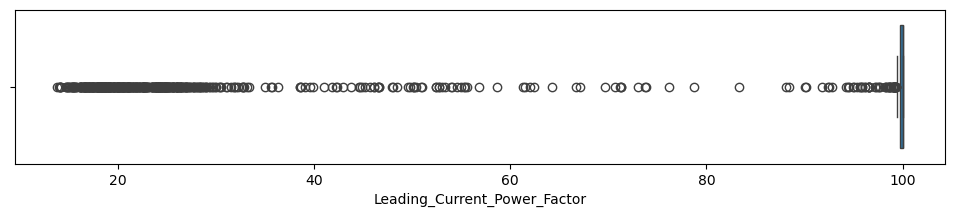

------------------------------------------------------------------------------------------------------------------------------------------------------
NSM:
min        0.0
25%    21600.0
50%    43200.0
75%    64800.0
max    85500.0
Name: NSM, dtype: float64


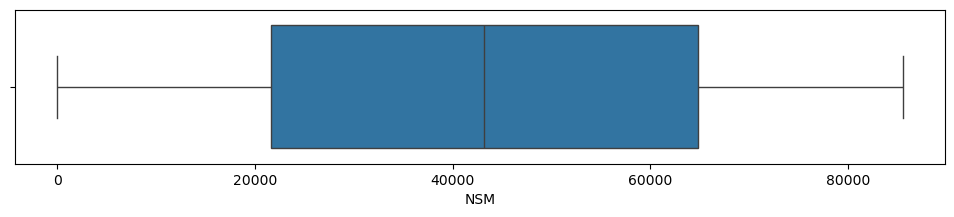

------------------------------------------------------------------------------------------------------------------------------------------------------


In [12]:
for col in numerical_columns:
    plt.figure(figsize=(12, 2))
    print(f"{col}:")
    print(df[col].describe()[['min', '25%', '50%', '75%', 'max']])
    sns.boxplot(df[col],orient="h")
    plt.show()
    print("-"*150)

**Conclusion**

`Usage_kWh` shows a number of outliers. The 5 number summary suggests a **very strong left skew**.


`Lagging_Current_Reactive_Power_kVarh` shows a larger number of outliers. The 5 number summary suggests a **strong left skew**.


`Leading_Current_Reactive_Power_kVarh` shows a massive number of outliers. The 5 number summary suggests a **very strong left skew**.


`CO2` shows few outliers. The 5 number summary suggests a **moderate left skew**.


`Lagging_Current_Power_Factor` has no outliers. The 5 number summary suggests a **weak right skew**.


`Leading_Current_Power_Factor` has a massive number of outliers. The 5 number summary suggests a **very strong right skew**.


`NSM` has no outliers. The 5 number summary suggests either a **normal *or* equal distribution**.


##### We will view the distributions in a following section.

<Axes: >

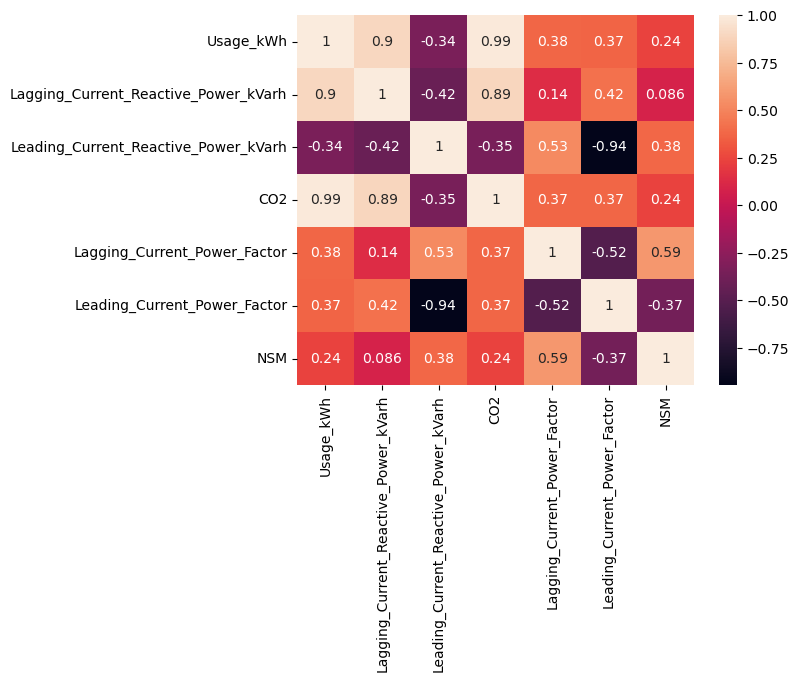

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

**Conclusion**

The heatmap shows many interesting correlations between variables.

`Usage_kWh` has a very strong postitive correlation with `Lagging_Current_Reactive_Power_kVarh` and `CO2`.

As a result of above, `Lagging_Current_Reactive_Power_kVarh` and `CO2` show strong positive correlation.

`Leading_Current_Reactive_Power_kVarh` and `Leading_Current_Power_Factor` show strong negative correlation.

There are numerous weaker correlations that can be explored however for the purpose of brevity, these relationships are omitted from the text.

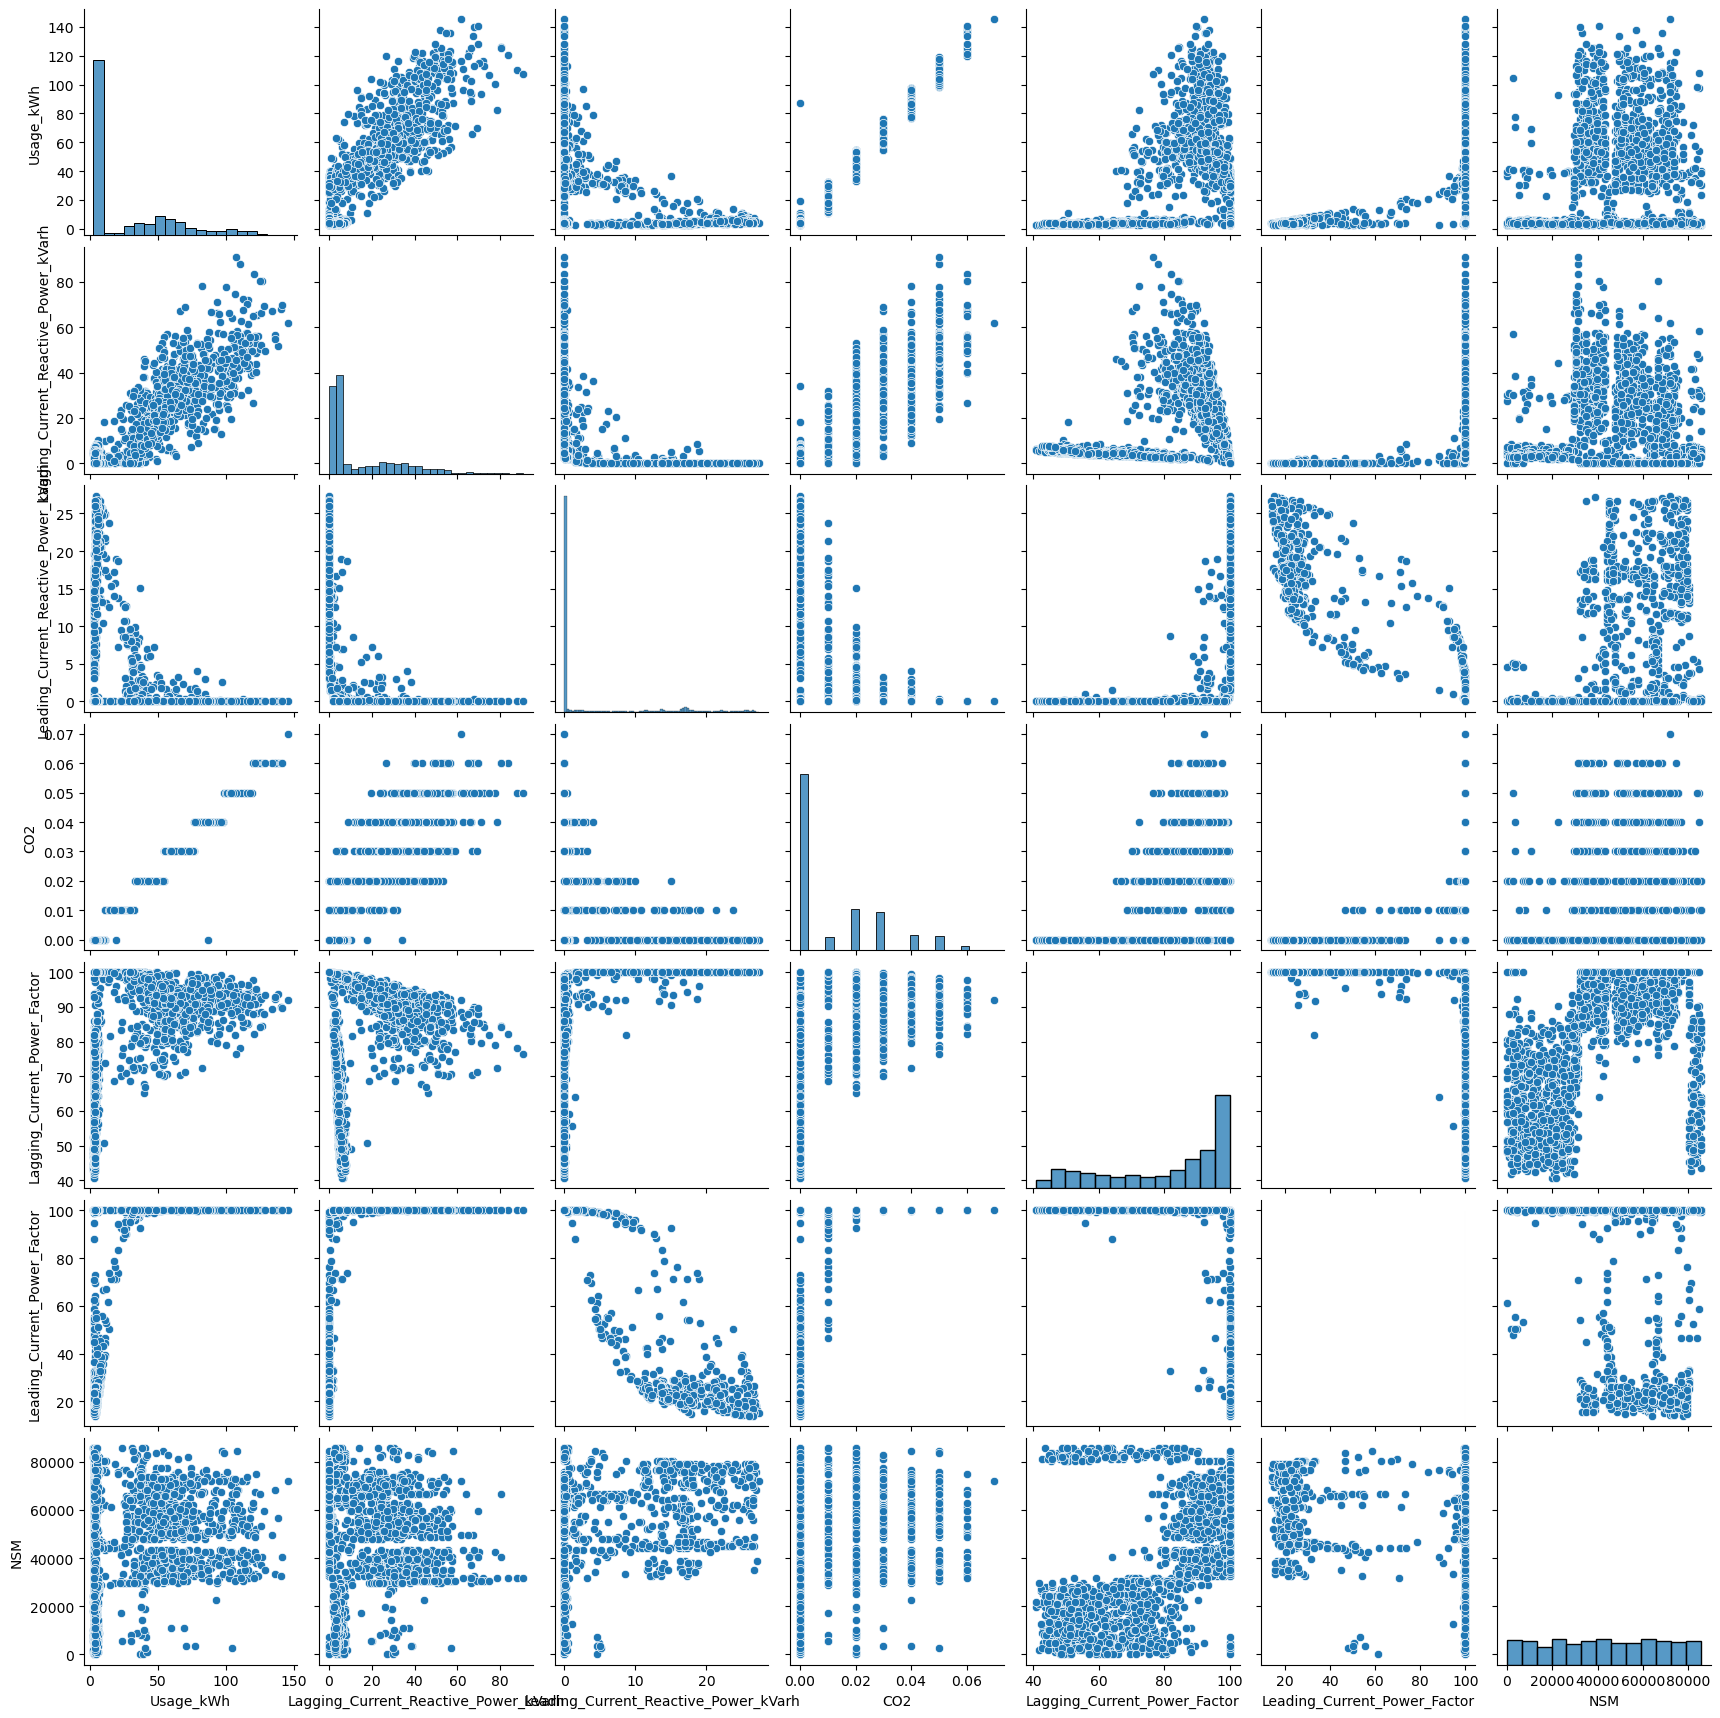

In [14]:
sns.pairplot(data=numerical_df)
plt.show()

**Conclusion**

The above pairplot reinforces the previously concluded correlations between variables.

As the correlations were mentioned before, the same conclusions will not be repeated.

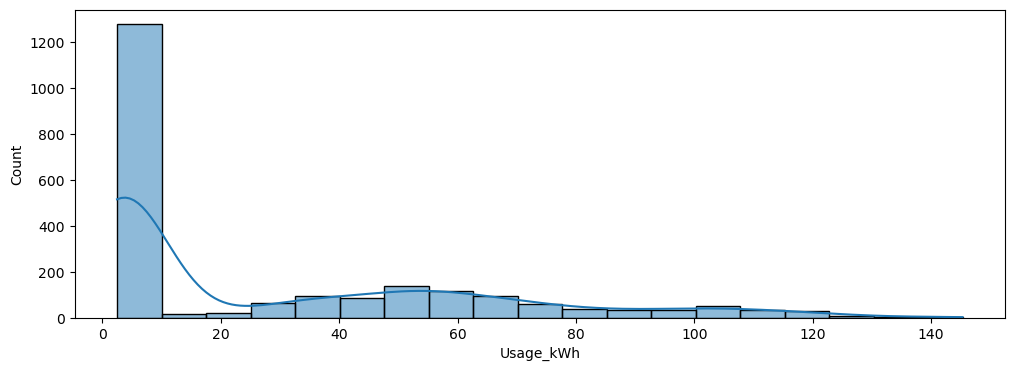

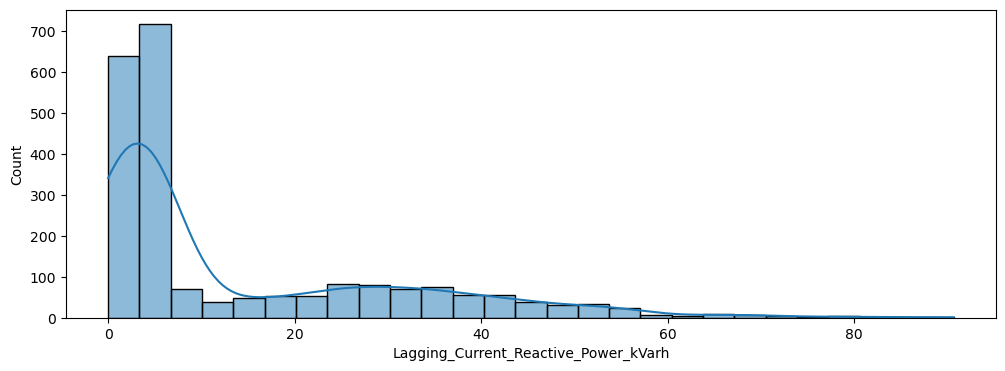

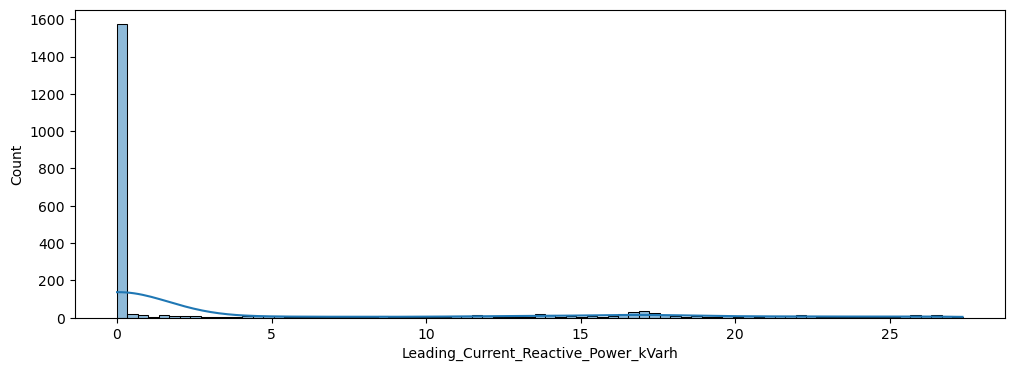

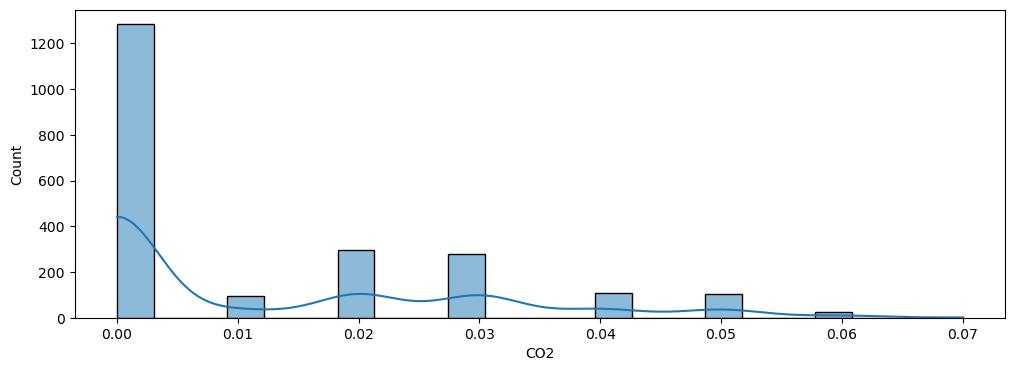

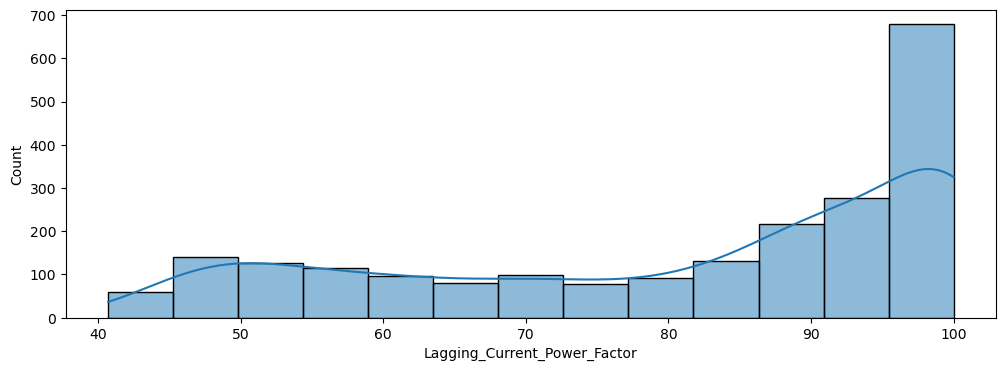

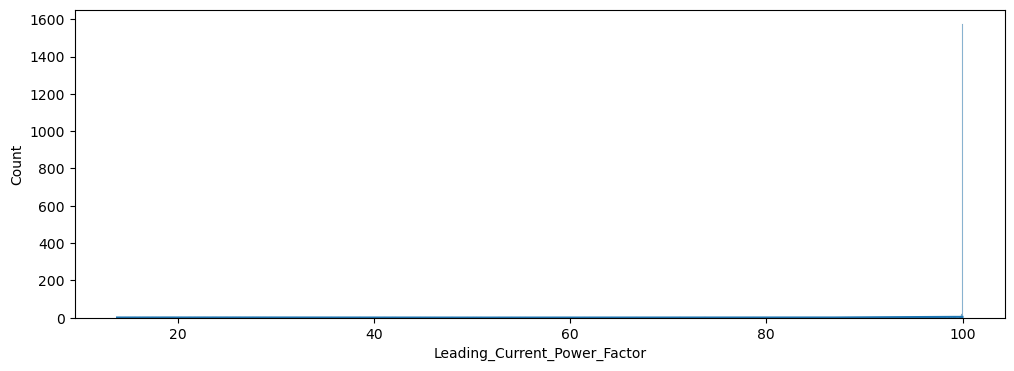

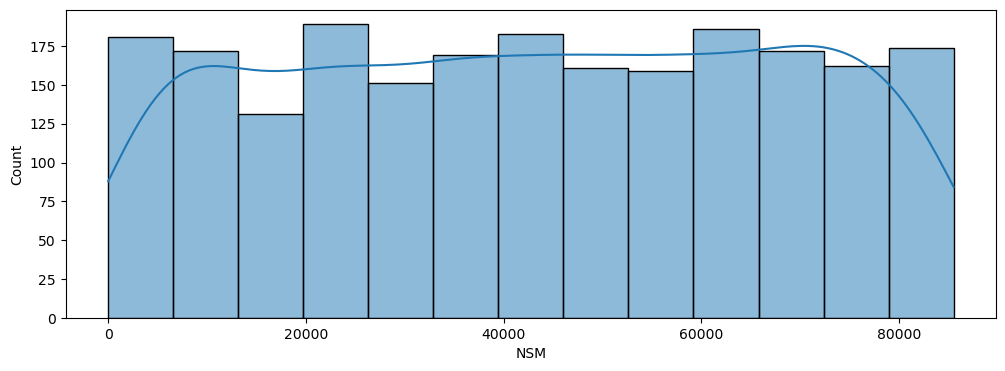

<Figure size 640x480 with 0 Axes>

In [15]:
for i, col in enumerate(numerical_df.columns):
    plt.figure(figsize=(12, 4))
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

plt.tight_layout()
plt.show()

**Conclusion**

All numerical columns look like they would benefit from a transformation to reduce the skew. 

--- Excluding the `NSM` column.

#### Let's examine the features containing outliers.

#### We may be able to treat or remove them.

In [16]:
outlier_columns = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2']
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    temp_df = df[(df[col] > upper_bound)]
    print(temp_df[col].size)

9
33
491
28


**Conclusion**

There's *at least* 491 unique outliers. 

This is too many to consider dropping the values so we will instead use a robust scalar when prepping the data.

## 4. Basic Analysis between features

### Disecting the Date feature into multiple features for energy consumption analysis

In [17]:
def extract_date_components(date_str):
    date_obj = datetime.strptime(date_str, '%d/%m/%Y %H:%M')
    date_of_month = date_obj.day
    month = date_obj.month
    year = date_obj.year
    time_of_day = date_obj.strftime('%H:%M')
    return date_of_month, month, year, time_of_day

In [18]:
df[['Date', 'Month', 'Year', 'TimeOfDay']] = df['date'].apply(lambda x: pd.Series(extract_date_components(x)))
df = df.drop(columns='date')

### We will look at the energy Usage in kWh over various time groupings.

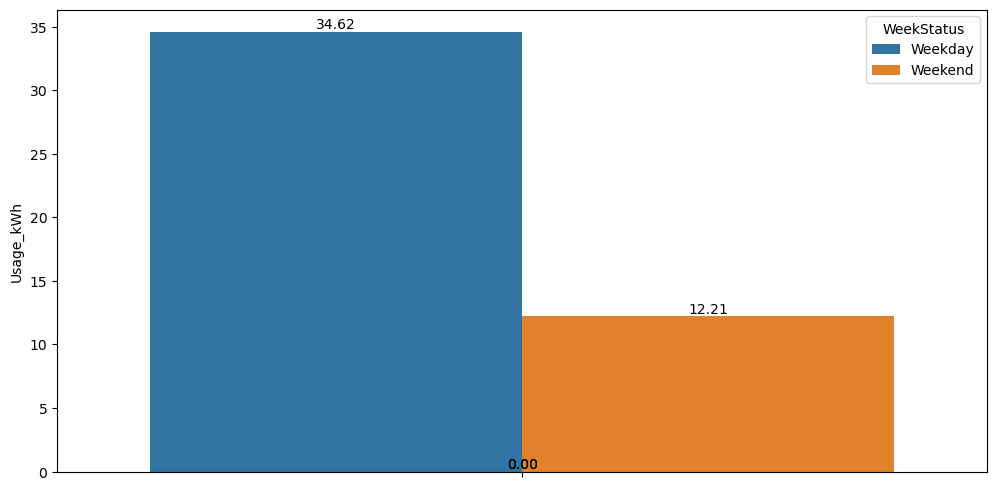

In [19]:
# Create Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, hue='WeekStatus', y='Usage_kWh', errorbar=None)

# Label the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')

plt.show()

**Conclusion**

Weekdays average a much higher (~3x) energy usage than weekends.

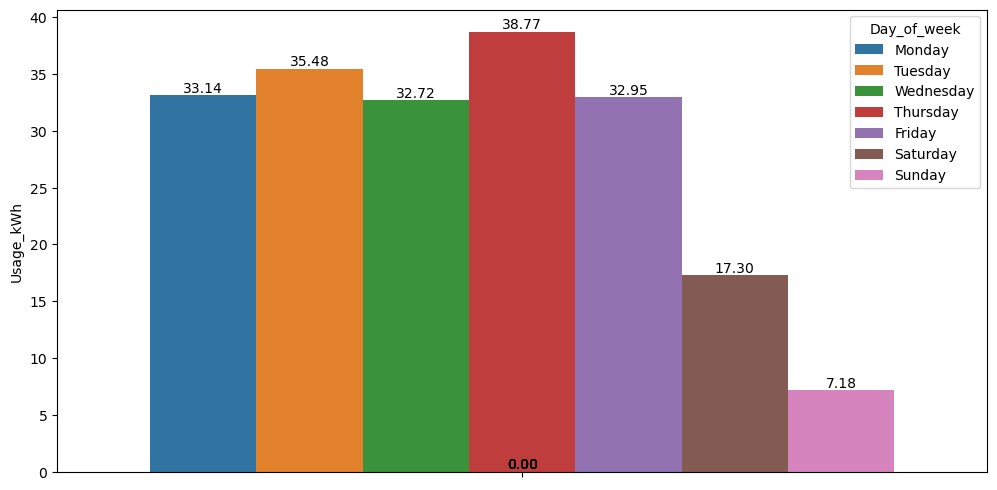

In [20]:
# Create Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df,hue='Day_of_week',y='Usage_kWh', errorbar=None)

# Label the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')

plt.show()

**Conclusion**

The above conclusion is reinforced, with weekdays averaging a higher energy usage than weekends.

We can see thursday is the highest average daily usage. This may imply employees in the machine factory will work longer on a thursday in order to get shipments prepped for the end of the week. However, this is purely hypotheical and may be further analysed.

We can see Sunday is the lowest average daily usage. This may imply that overtime worked by employees is most likely to be a saturday. However, this is purely hypotheical and may be further analysed.

#### Lets temporarily changed the month feature to a string, to give it meaning.

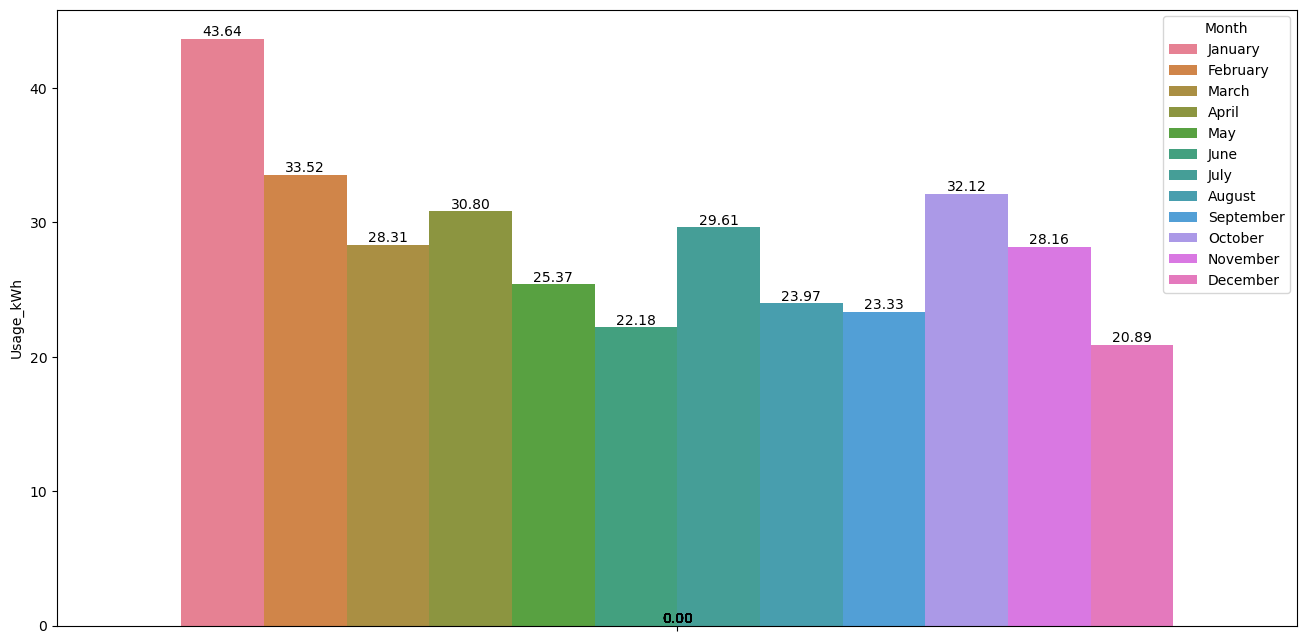

In [21]:
plt.figure(figsize=(16, 8))
# Copy of DF so we don't edit the orginal.
temp_df = df.copy()
mapper = {1:'January', 
          2:'February', 
          3:'March', 
          4:'April', 
          5:'May', 
          6:'June', 
          7:'July', 
          8:'August', 
          9:'September', 
          10:'October', 
          11:'November', 
          12:'December'}
temp_df['Month'] = temp_df['Month'].replace(mapper)

# Create Plot
ax = sns.barplot(data=temp_df,hue='Month',y='Usage_kWh', errorbar=None)

# Label the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')

plt.show()

**Conclusion**

The distribution of the average energy used across each month is shown.

Janurary is the highest usage, Decemeber is the Lowest usage.

Some potential reasons could be the required heat in the facory over the winter months. December is lower as the factory may be closed over the holiday period.

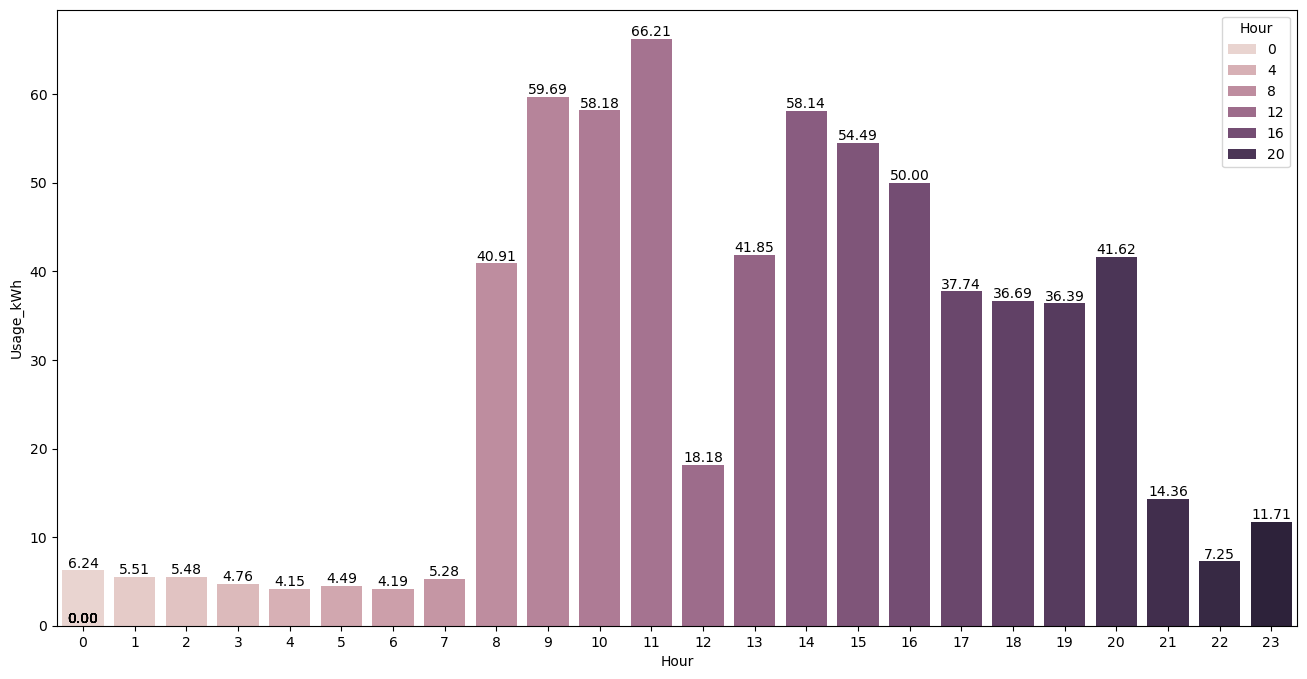

In [22]:
plt.figure(figsize=(16, 8))
temp_df = df.copy()
temp_df['Hour'] = df['TimeOfDay'].apply(lambda x: x[0:2])
temp_df['Hour'] = temp_df['Hour'].astype(int)

# Create Plot
ax = sns.barplot(data=temp_df, x='Hour', y='Usage_kWh', hue='Hour', errorbar=None)

# Label the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')

plt.show()

In [23]:
np.version.version # Note the above graphic has been tested and ran on Numpy Version 1.26.3

'1.26.3'

**Conclusion**

Very Low power usage over the period 12am to 7:59am.

Spike at 8am. This is likely the time the factory begins work for the day.

Drop at 12pm. This is likely when employees are taking lunch breaks.

Slowly tapers off as the evening approaches and goes into night.

Drop at 9pm. This is likely when most employees have gone home, including an evening shift employee. There is higher energy usage between 9pm and 11:59pm than is seen before the day starts. This may be due to machines running automated processing for a couple of hours.

## Save the dataset

**Lets reconstruct the date feature**

In [24]:
df['Hour'] = temp_df['Hour']

In [25]:
df['Minute'] = df['TimeOfDay'].apply(lambda x: x[3:5])
df['Minute'] = df['Minute'].astype(int)
df = df.drop(columns='TimeOfDay')

In [26]:
df = df.rename(columns={"Date":"Day"}) 
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df = df.drop(columns=['Month', 'Year', 'Hour', 'Minute', 'Day'])

**Finally, Let's save the minor changes as a file to be used for Data prep**

In [27]:
df.to_csv("steel_industry_data_pre_prep.csv")